# Introduction to Artificial Neural Networks with Keras

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_classifier = Perceptron(random_state=42)
per_classifier.fit(X, y)

per_classifier.predict([[2, 0.5], [3,1]])

array([ True, False])

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_regressor = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_regressor)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

0.5053326657968725

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_classifier = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000 ,random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_classifier)
pipeline.fit(X_train, y_train)
pipeline.score(X_valid, y_valid)

1.0

In [1]:
%pip install tensorflow-directml-plugin

  Using cached tensorflow_directml_plugin-0.4.0.dev230202-cp310-cp310-win_amd64.whl (9.0 MB)
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ----------- ---------------------------- 1.2/4.1 MB 24.8 MB/s eta 0:00:01
     ------------------------------- -------- 3.2/4.1 MB 34.2 MB/s eta 0:00:01
     ---------------------------------------- 4.1/4.1 MB 32.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/64.5 kB ? eta -:--:--
     ---------------------------------------- 64.5/64.5 kB ? eta 0:00:00
  Using cached tensorflow_cpu-2.10.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.10.0-cp310-cp310-win_amd64.whl (262.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Us


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [4]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
               "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Ankle boot'

In [18]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# OR
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers

In [21]:
hidden = model.layers[1]
hidden.name

'dense_3'

In [22]:
# Use to clear session 
#tf.keras.backend.clear_session()

In [23]:
weights, biases = hidden.get_weights()
weights.shape, biases.shape

((784, 300), (300,))

In [24]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=['accuracy']
)

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7219 - accuracy: 0.7611 - val_loss: 0.5164 - val_accuracy: 0.8240
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4896 - accuracy: 0.8292 - val_loss: 0.4626 - val_accuracy: 0.8368
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4419 - accuracy: 0.8452 - val_loss: 0.4311 - val_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4166 - accuracy: 0.8546 - val_loss: 0.3975 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3955 - accuracy: 0.8622 - val_loss: 0.3968 - val_accuracy: 0.8572
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3796 - accuracy: 0.8673 - val_loss: 0.3949 - val_accuracy: 0.8636
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3671 - accuracy: 0.8695 - val_loss: 0.3754 - val_accuracy:

<Axes: xlabel='Epoch'>

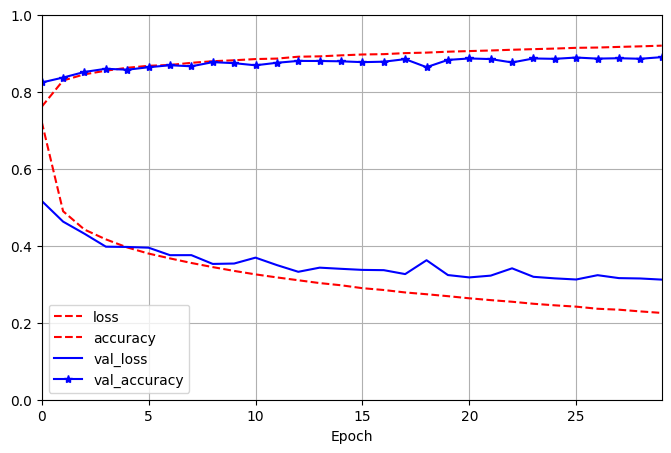

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epoch',
    style=['r--', 'r--', 'b-', 'b-*']
)

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8831


[0.3284030556678772, 0.8830999732017517]

In [28]:
model.predict(X_test[:3]).round(2)

1/1 [==============================] - 0s 70ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [30]:
import numpy as np
y_proba = model.predict(X_test[:3])
y_pred = y_proba.argmax(axis=-1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 19ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')